In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
data = pd.read_csv('IBM_train.csv')
data.head()

,Date,Open,High,Low,Close,Adjusted_close,Volume,Dividend
0,12/31/09,132.41,132.85,130.75,130.90,78.220968,4223400,0.0
1,12/30/09,131.23,132.68,130.68,132.57,79.218898,3867000,0.0
2,12/29/09,132.28,132.37,131.80,131.85,78.788652,4184200,0.0
3,12/28/09,130.99,132.31,130.72,132.31,79.063531,5800400,0.0
4,12/24/09,129.89,130.57,129.48,130.57,78.023772,4265100,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2558 non-null   object 
 1   Open            2558 non-null   float64
 2   High            2558 non-null   float64
 3   Low             2558 non-null   float64
 4   Close           2558 non-null   float64
 5   Adjusted_close  2558 non-null   float64
 6   Volume          2558 non-null   int64  
 7   Dividend        2558 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 160.0+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.dropna()
data.info()

C:\Users\Satyajit Satapathy\AppData\Local\Temp\ipykernel_16232\2409722558.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2558 non-null   datetime64[ns]
 1   Open            2558 non-null   float64       
 2   High            2558 non-null   float64       
 3   Low             2558 non-null   float64       
 4   Close           2558 non-null   float64       
 5   Adjusted_close  2558 non-null   float64       
 6   Volume          2558 non-null   int64         
 7   Dividend        2558 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 160.0 KB


In [7]:
trainData = data.iloc[:, 5:6].values


In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2558, 1)

In [9]:
x_train = []
y_train = []
for i in range(60, 2558):
    x_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2498, 60, 1)

In [11]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
79/79 - 17s - loss: 0.0205 - 17s/epoch - 215ms/step
Epoch 2/20
79/79 - 6s - loss: 0.0070 - 6s/epoch - 81ms/step
Epoch 3/20
79/79 - 6s - loss: 0.0062 - 6s/epoch - 80ms/step
Epoch 4/20
79/79 - 6s - loss: 0.0053 - 6s/epoch - 81ms/step
Epoch 5/20
79/79 - 6s - loss: 0.0051 - 6s/epoch - 80ms/step
Epoch 6/20
79/79 - 6s - loss: 0.0046 - 6s/epoch - 76ms/step
Epoch 7/20
79/79 - 6s - loss: 0.0043 - 6s/epoch - 76ms/step
Epoch 8/20
79/79 - 6s - loss: 0.0039 - 6s/epoch - 79ms/step
Epoch 9/20
79/79 - 7s - loss: 0.0040 - 7s/epoch - 83ms/step
Epoch 10/20
79/79 - 8s - loss: 0.0036 - 8s/epoch - 96ms/step
Epoch 11/20
79/79 - 8s - loss: 0.0038 - 8s/epoch - 96ms/step
Epoch 12/20
79/79 - 7s - loss: 0.0036 - 7s/epoch - 95ms/step
Epoch 13/20
79/79 - 6s - loss: 0.0031 - 6s/epoch - 81ms/step
Epoch 14/20
79/79 - 7s - loss: 0.0033 - 7s/epoch - 87ms/step
Epoch 15/20
79/79 - 6s - loss: 0.0028 - 6s/epoch - 80ms/step
Epoch 16/20
79/79 - 7s - loss: 0.0028 - 7s/epoch - 83ms/step
Epoch 17/20
79/79 - 7s - loss:

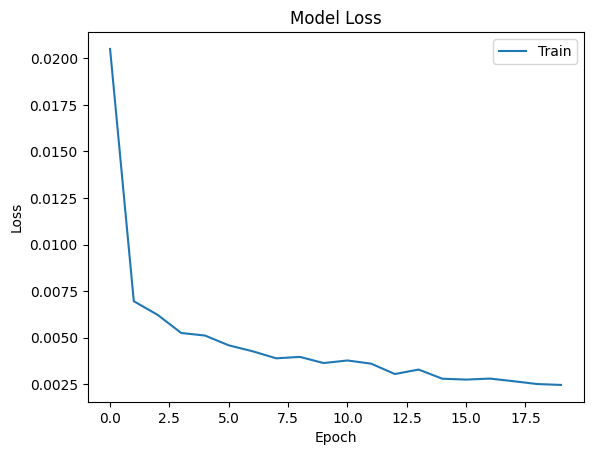

In [14]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [69]:
# Load the data from the CSV file
testData = pd.read_csv('IBM_test.csv')
testData['Date'] = pd.to_datetime(testData['Date'], format='%m/%d/%y')
dates = testData['Date'].iloc[60:].values
testData = testData.dropna()
testData = testData.iloc[:, 5:6]

# Extract the target values
y_test = testData.iloc[60:, 0:].values

# Extract the input values and perform any necessary transformations
input_close = testData.iloc[:, 0:].values
input_close = sc.transform(input_close)
input_close.shape 

# Reshape the input data
x_test = []
length = len(testData)
timestep = 60
for i in range(timestep, length):
    x_test.append(input_close[i-timestep:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check the shape of the x_test array
x_test.shape


(3331, 60, 1)

In [45]:
y_pred = model.predict(x_test)

105/105 [==============================] - 4s 39ms/step


In [47]:
predicted_price = sc.inverse_transform(y_pred)

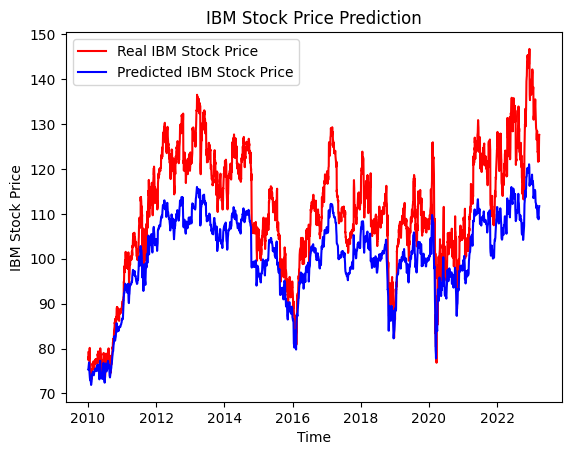

In [70]:
plt.plot(dates, y_test, color = 'red', label = 'Real IBM Stock Price')
plt.plot(dates, predicted_price, color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()